In [6]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df=pd.read_csv('StudentsPerformance.csv')

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Here the target variable is pass or fail and is not created so create by taking the averga math,reading score,writing score and then apply the threshold

In [9]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

In [10]:
df['pass']=df['average_score'].apply(lambda x:1 if x>=50 else 0)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average_score                1000 non-null   float64
 9   pass                         1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [16]:
df=df.drop(['lunch'],axis=1)

In [60]:
df=df.drop(['gender'],axis=1)

In [61]:
df

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score,pass
0,group B,bachelor's degree,none,72,72,74,72.666667,1
1,group C,some college,completed,69,90,88,82.333333,1
2,group B,master's degree,none,90,95,93,92.666667,1
3,group A,associate's degree,none,47,57,44,49.333333,0
4,group C,some college,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,completed,88,99,95,94.000000,1
996,group C,high school,none,62,55,55,57.333333,1
997,group C,high school,completed,59,71,65,65.000000,1
998,group D,some college,completed,68,78,77,74.333333,1


In [62]:
df.describe()

,math score,reading score,writing score,average_score,pass
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667,0.897000
std,15.16308,14.600192,15.195657,14.257326,0.304111
min,0.00000,17.000000,10.000000,9.000000,0.000000
25%,57.00000,59.000000,57.750000,58.333333,1.000000
50%,66.00000,70.000000,69.000000,68.333333,1.000000
75%,77.00000,79.000000,79.000000,77.666667,1.000000
max,100.00000,100.000000,100.000000,100.000000,1.000000


In [63]:
df.isna().sum()

race/ethnicity                 0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
pass                           0
dtype: int64

<Axes: xlabel='pass', ylabel='Count'>

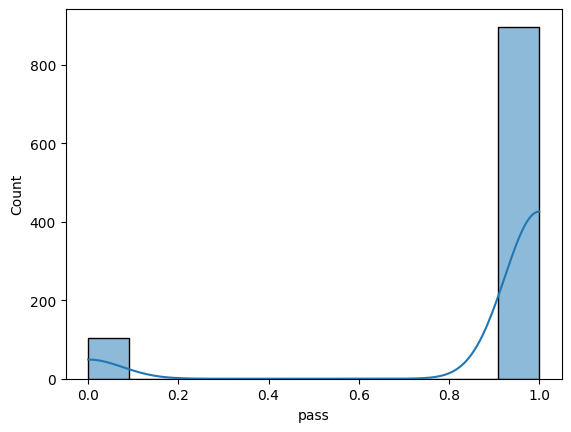

In [64]:
sns.histplot(df['pass'],kde=True)

In [65]:
df.corr(numeric_only=True)

,math score,reading score,writing score,average_score,pass
math score,1.000000,0.817580,0.802642,0.918746,0.549460
reading score,0.817580,1.000000,0.954598,0.970331,0.594595
writing score,0.802642,0.954598,1.000000,0.965667,0.600787
average_score,0.918746,0.970331,0.965667,1.000000,0.611196
pass,0.549460,0.594595,0.600787,0.611196,1.000000


<Axes: >

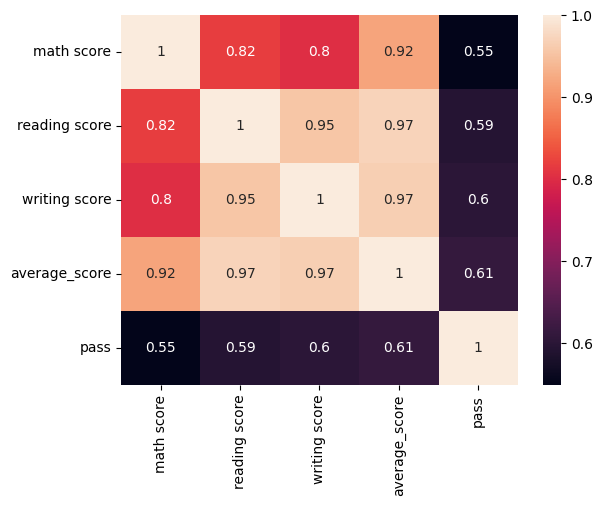

In [66]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

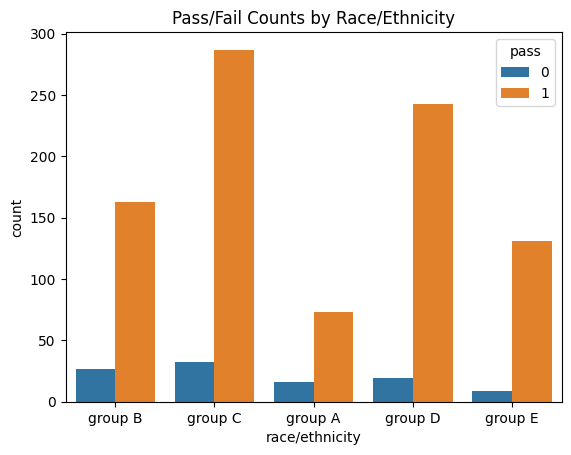

In [67]:
sns.countplot(x='race/ethnicity', hue='pass', data=df)
plt.title('Pass/Fail Counts by Race/Ethnicity')
plt.show()

In [68]:
df.head()

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score,pass
0,group B,bachelor's degree,none,72,72,74,72.666667,1
1,group C,some college,completed,69,90,88,82.333333,1
2,group B,master's degree,none,90,95,93,92.666667,1
3,group A,associate's degree,none,47,57,44,49.333333,0
4,group C,some college,none,76,78,75,76.333333,1


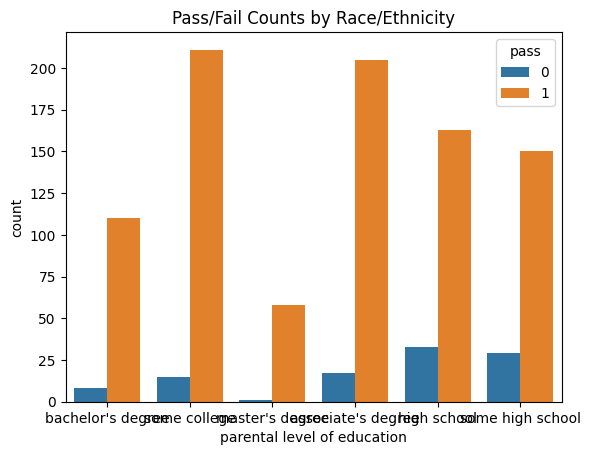

In [69]:
sns.countplot(x='parental level of education', hue='pass', data=df)
plt.title('Pass/Fail Counts by Race/Ethnicity')
plt.show()

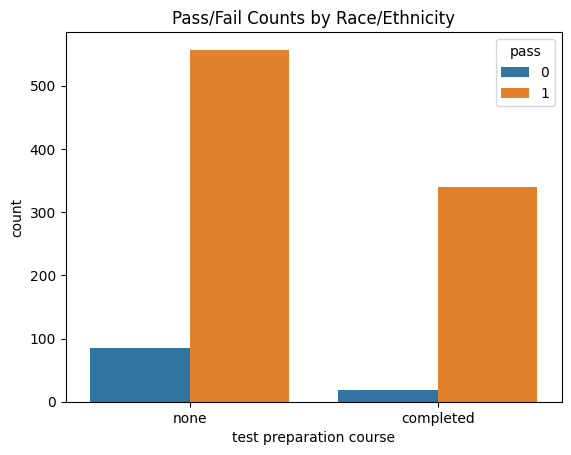

In [70]:
sns.countplot(x='test preparation course', hue='pass', data=df)
plt.title('Pass/Fail Counts by Race/Ethnicity')
plt.show()

In [71]:
X = df.drop(columns = ['pass'],axis = 1)
y = df['pass']

In [72]:
X

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score
0,group B,bachelor's degree,none,72,72,74,72.666667
1,group C,some college,completed,69,90,88,82.333333
2,group B,master's degree,none,90,95,93,92.666667
3,group A,associate's degree,none,47,57,44,49.333333
4,group C,some college,none,76,78,75,76.333333
...,...,...,...,...,...,...,...
995,group E,master's degree,completed,88,99,95,94.000000
996,group C,high school,none,62,55,55,57.333333
997,group C,high school,completed,59,71,65,65.000000
998,group D,some college,completed,68,78,77,74.333333


# Encoding

In [73]:
df.columns

Index(['race/ethnicity', 'parental level of education',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average_score', 'pass'],
      dtype='object')

In [74]:
df.head(1)

,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score,average_score,pass
0,group B,bachelor's degree,none,72,72,74,72.666667,1


In [75]:
X_one_encode = pd.get_dummies(X,columns = ['race/ethnicity','parental level of education','test preparation course'],drop_first = True)

In [76]:
X_one_encode = X_one_encode.astype(int)

In [77]:
X_one_encode

,math score,reading score,writing score,average_score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,72,72,74,72,1,0,0,0,1,0,0,0,0,1
1,69,90,88,82,0,1,0,0,0,0,0,1,0,0
2,90,95,93,92,1,0,0,0,0,0,1,0,0,1
3,47,57,44,49,0,0,0,0,0,0,0,0,0,1
4,76,78,75,76,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,94,0,0,0,1,0,0,1,0,0,0
996,62,55,55,57,0,1,0,0,0,1,0,0,0,1
997,59,71,65,65,0,1,0,0,0,1,0,0,0,0
998,68,78,77,74,0,0,1,0,0,0,0,1,0,0


In [78]:
X_one_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   math score                                     1000 non-null   int64
 1   reading score                                  1000 non-null   int64
 2   writing score                                  1000 non-null   int64
 3   average_score                                  1000 non-null   int64
 4   race/ethnicity_group B                         1000 non-null   int64
 5   race/ethnicity_group C                         1000 non-null   int64
 6   race/ethnicity_group D                         1000 non-null   int64
 7   race/ethnicity_group E                         1000 non-null   int64
 8   parental level of education_bachelor's degree  1000 non-null   int64
 9   parental level of education_high school        1000 non-null   int64
 10  p

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
numerical_cols = ['average_score', 'writing score', 'reading score', 'math score']
scaler = StandardScaler()
X_one_encode[numerical_cols] = scaler.fit_transform(X_one_encode[numerical_cols])

In [81]:
X_one_encode

,math score,reading score,writing score,average_score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_none
0,0.390024,0.193999,0.391492,0.319510,1,0,0,0,1,0,0,0,0,1
1,0.192076,1.427476,1.313269,1.020960,0,1,0,0,0,0,0,1,0,0
2,1.577711,1.770109,1.642475,1.722410,1,0,0,0,0,0,1,0,0,1
3,-1.259543,-0.833899,-1.583744,-1.293824,0,0,0,0,0,0,0,0,0,1
4,0.653954,0.605158,0.457333,0.600090,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.445746,2.044215,1.774157,1.862700,0,0,0,1,0,0,1,0,0,0
996,-0.269803,-0.970952,-0.859491,-0.732664,0,1,0,0,0,1,0,0,0,1
997,-0.467751,0.125472,-0.201079,-0.171504,0,1,0,0,0,1,0,0,0,0
998,0.126093,0.605158,0.589015,0.459800,0,0,1,0,0,0,0,1,0,0


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_one_encode, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [86]:
y_pred = model.predict(X_test)

In [87]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [89]:
y_test

521    1
737    1
740    1
660    1
411    1
      ..
408    1
332    1
208    1
613    1
78     1
Name: pass, Length: 200, dtype: int64

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.995
Precision: 0.9942528735632183
Recall: 1.0
